In [1]:
# Step 1.1 - Load dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

# Load dataset
data = load_breast_cancer()

# Features and target
X = data.data
y = data.target


In [2]:
# Convert to DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Show first 5 rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Step 2.1 - Missing value analysis
df.isnull().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [4]:
# Step 2.2 - Outlier analysis using IQR
Q1 = df.drop(columns='target').quantile(0.25)
Q3 = df.drop(columns='target').quantile(0.75)
IQR = Q3 - Q1

outlier_counts = ((df.drop(columns='target') < (Q1 - 1.5 * IQR)) | 
                  (df.drop(columns='target') > (Q3 + 1.5 * IQR))).sum()

outlier_counts.sort_values(ascending=False).head()


area error          65
radius error        38
perimeter error     38
worst area          35
smoothness error    30
dtype: int64

In [5]:
# Step 2.3 - Data types
df.dtypes

# Count numerical and categorical features
num_features = df.select_dtypes(include=['float64', 'int64']).shape[1]
cat_features = df.select_dtypes(include=['object']).shape[1]

num_features, cat_features


(30, 0)

In [6]:
# 3.1 Statistical summary
eda_stats = df.describe().T

# Add median manually
eda_stats['median'] = df.median()

eda_stats

,count,mean,std,min,25%,50%,75%,max,median
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,13.370000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,18.840000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,86.240000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,551.100000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,0.095870
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,0.092630
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,0.061540
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,0.033500
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,0.179200
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,0.061540


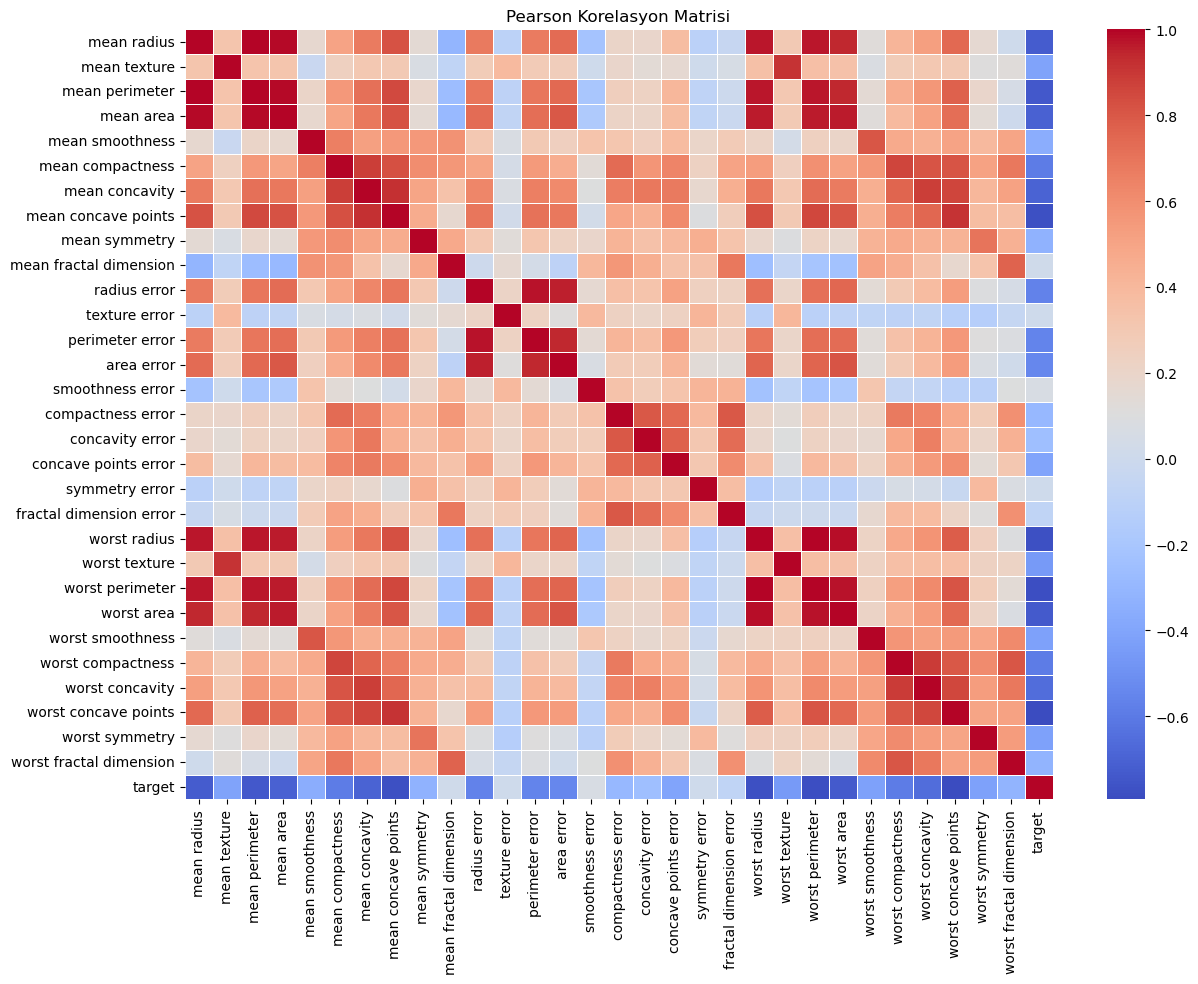

In [7]:
#3.2 Pearson correlation with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Pearson Korelasyon Matrisi")
plt.show()


In [8]:
# Get top correlated pairs
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove self-correlation
corr_pairs = corr_pairs[corr_pairs < 1]

corr_pairs.head(6)

mean perimeter   mean radius        0.997855
mean radius      mean perimeter     0.997855
worst radius     worst perimeter    0.993708
worst perimeter  worst radius       0.993708
mean area        mean radius        0.987357
mean radius      mean area          0.987357
dtype: float64

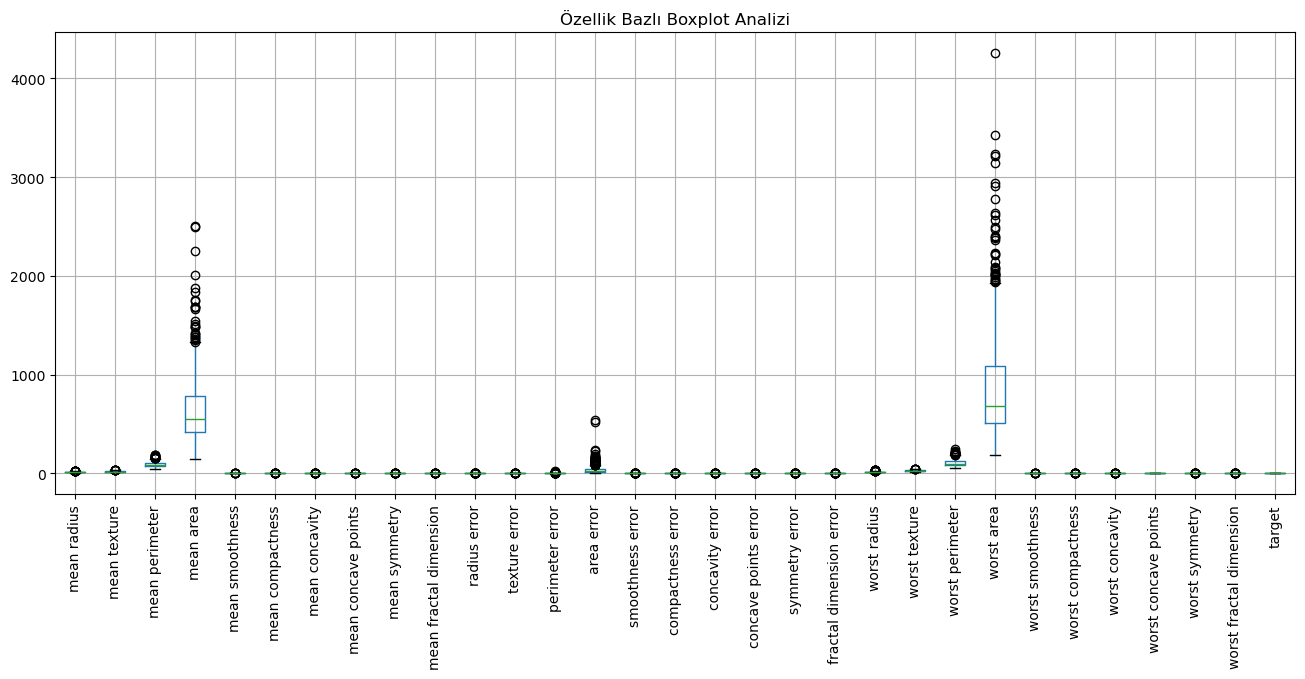

In [9]:
#3.4 Box plots Analysis
plt.figure(figsize=(16,6))
df.boxplot(rot=90)
plt.title("Özellik Bazlı Boxplot Analizi")
plt.show()


In [11]:
#4 Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [13]:
#step 5.1 - Train-test split
from sklearn.model_selection import train_test_split

# Step 1: Train (70%) + Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y
)

# Step 2: Validation (10%) + Test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp
)

# Check sizes
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (398, 30)
Validation: (57, 30)
Test: (114, 30)


Selected PCA components: 6


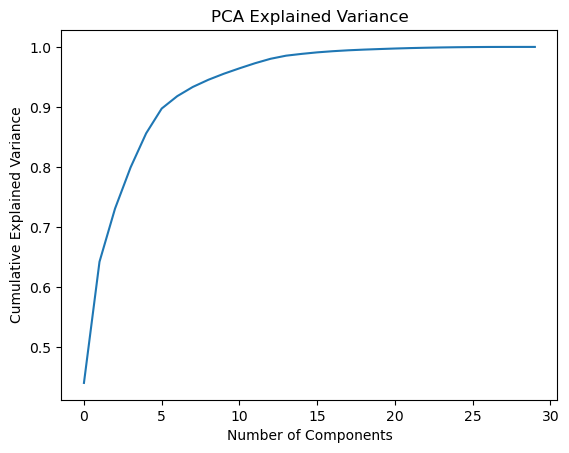

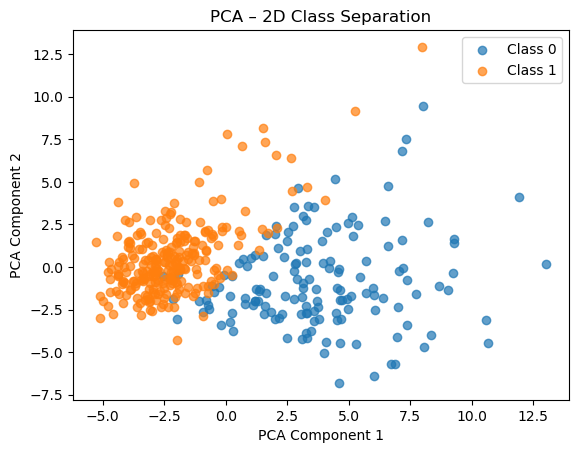

In [16]:
#6.1 PCA 
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA with all components
pca_full = PCA()
pca_full.fit(X_train)

explained_variance = pca_full.explained_variance_ratio_
mean_variance = np.mean(explained_variance)

# Select components above mean explained variance
n_components_pca = np.sum(explained_variance > mean_variance)
print("Selected PCA components:", n_components_pca)
pca = PCA(n_components=n_components_pca)

X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

plt.figure()
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

plt.figure()
for label in np.unique(y_train):
    plt.scatter(
        X_train_pca[y_train == label, 0],
        X_train_pca[y_train == label, 1],
        label=f"Class {label}",
        alpha=0.7
    )

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.title("PCA – 2D Class Separation")
plt.show()



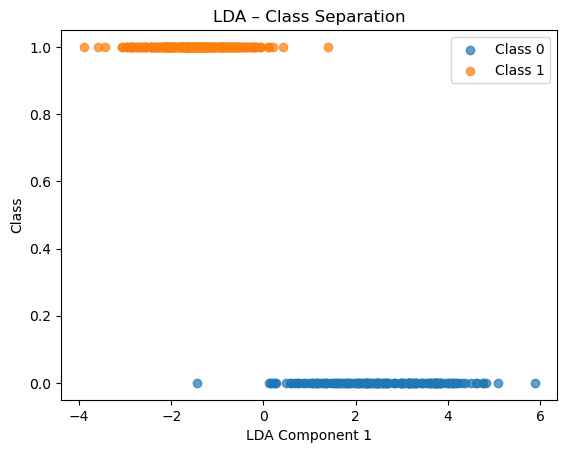

In [21]:
#6.2 LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

X_train_lda = lda.fit_transform(X_train, y_train)
X_val_lda = lda.transform(X_val)
X_test_lda = lda.transform(X_test)
plt.figure()
for label in np.unique(y_train):
    plt.scatter(
        X_train_lda[y_train == label, 0],
        [label] * len(X_train_lda[y_train == label]),
        label=f"Class {label}",
        alpha=0.7
    )

plt.xlabel("LDA Component 1")
plt.ylabel("Class")
plt.legend()
plt.title("LDA – Class Separation")
plt.show()


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Define datasets dictionary
datasets = {
    "Raw": (X_train, X_val, X_test),
    "PCA": (X_train_pca, X_val_pca, X_test_pca),
    "LDA": (X_train_lda, X_val_lda, X_test_lda)
}

trained_models = {}

for data_name, (X_tr, X_vl, X_te) in datasets.items():
    
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Naive Bayes": GaussianNB(),
        "XGBoost": XGBClassifier(
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42
        )
    }

    for model_name, model in models.items():
        model.fit(X_tr, y_train)
        trained_models[(data_name, model_name)] = model
        
        val_acc = model.score(X_vl, y_val)
        test_acc = model.score(X_te, y_test)
        
        print(f"{data_name} | {model_name} → Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}")


Raw | Logistic Regression → Val Acc: 1.0000, Test Acc: 0.9737
Raw | Decision Tree → Val Acc: 0.8947, Test Acc: 0.9298
Raw | Random Forest → Val Acc: 0.9825, Test Acc: 0.9123
Raw | Naive Bayes → Val Acc: 0.9649, Test Acc: 0.9211
Raw | XGBoost → Val Acc: 0.9825, Test Acc: 0.9561
PCA | Logistic Regression → Val Acc: 1.0000, Test Acc: 0.9561
PCA | Decision Tree → Val Acc: 0.9298, Test Acc: 0.9298


c:\Users\DELL\anaconda3\envs\ml_exam\lib\site-packages\xgboost\training.py:199: UserWarning: [23:41:31] WARNING: D:\bld\xgboost-split_1765326876395\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


PCA | Random Forest → Val Acc: 0.9649, Test Acc: 0.9298
PCA | Naive Bayes → Val Acc: 0.9474, Test Acc: 0.9298
PCA | XGBoost → Val Acc: 0.9825, Test Acc: 0.9561
LDA | Logistic Regression → Val Acc: 0.9825, Test Acc: 0.9561
LDA | Decision Tree → Val Acc: 0.9825, Test Acc: 0.9123


c:\Users\DELL\anaconda3\envs\ml_exam\lib\site-packages\xgboost\training.py:199: UserWarning: [23:41:32] WARNING: D:\bld\xgboost-split_1765326876395\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


LDA | Random Forest → Val Acc: 0.9825, Test Acc: 0.9123
LDA | Naive Bayes → Val Acc: 0.9825, Test Acc: 0.9561
LDA | XGBoost → Val Acc: 1.0000, Test Acc: 0.9386


c:\Users\DELL\anaconda3\envs\ml_exam\lib\site-packages\xgboost\training.py:199: UserWarning: [23:41:32] WARNING: D:\bld\xgboost-split_1765326876395\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [36]:
# STEP 8: Validation Performance Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

results = []

for (data_name, model_name), model in trained_models.items():
    
    # Select correct validation data
    if data_name == "Raw":
        X_val_used = X_val
    elif data_name == "PCA":
        X_val_used = X_val_pca
    elif data_name == "LDA":
        X_val_used = X_val_lda
    else:
        raise ValueError(f"Unknown data_name: {data_name}")

    y_pred = model.predict(X_val_used)

    # Some models need probability output for ROC-AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_val_used)[:, 1]
        roc_auc = roc_auc_score(y_val, y_prob)
    else:
        roc_auc = None

    results.append({
        "Data Representation": data_name,
        "Model": model_name,
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1-score": f1_score(y_val, y_pred),
        "ROC-AUC": roc_auc
    })

results_df = pd.DataFrame(results)
results_df

,Data Representation,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Raw,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
1,Raw,Decision Tree,0.894737,0.968750,0.861111,0.911765,0.906746
2,Raw,Random Forest,0.982456,1.000000,0.972222,0.985915,0.998677
3,Raw,Naive Bayes,0.964912,0.972222,0.972222,0.972222,0.996032
4,Raw,XGBoost,0.982456,0.972973,1.000000,0.986301,1.000000
5,PCA,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
6,PCA,Decision Tree,0.929825,0.944444,0.944444,0.944444,0.924603
7,PCA,Random Forest,0.964912,0.947368,1.000000,0.972973,0.996032
8,PCA,Naive Bayes,0.947368,0.945946,0.972222,0.958904,0.988095
9,PCA,XGBoost,0.982456,1.000000,0.972222,0.985915,1.000000


In [ ]:
# Step 9: Find the best model based on validation F1-score
best_row = results_df.loc[results_df['F1-score'].idxmax()]
best_model_key = (best_row['Data Representation'], best_row['Model'])
best_model = trained_models[best_model_key]

# Select correct test data
if best_model_key[0] == "Raw":
    X_test_used = X_test
elif best_model_key[0] == "PCA":
    X_test_used = X_test_pca
else:
    X_test_used = X_test_lda

y_test_pred = best_model.predict(X_test_used)

if hasattr(best_model, "predict_proba"):
    y_test_prob = best_model.predict_proba(X_test_used)[:, 1]
    test_roc_auc = roc_auc_score(y_test, y_test_prob)
else:
    test_roc_auc = None

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-score:", f1_score(y_test, y_test_pred))
print("ROC-AUC:", test_roc_auc)


Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1-score: 0.9790209790209791
ROC-AUC: 0.9967245332459875


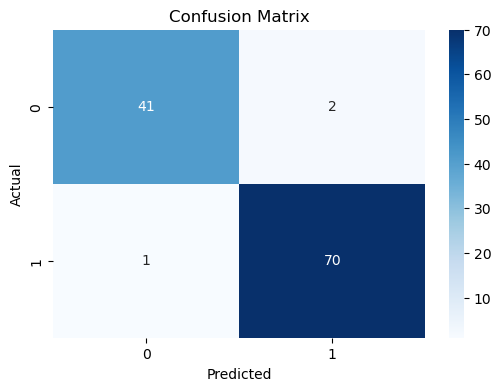

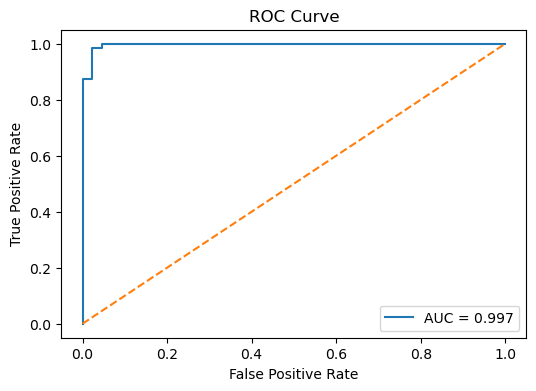

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {test_roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



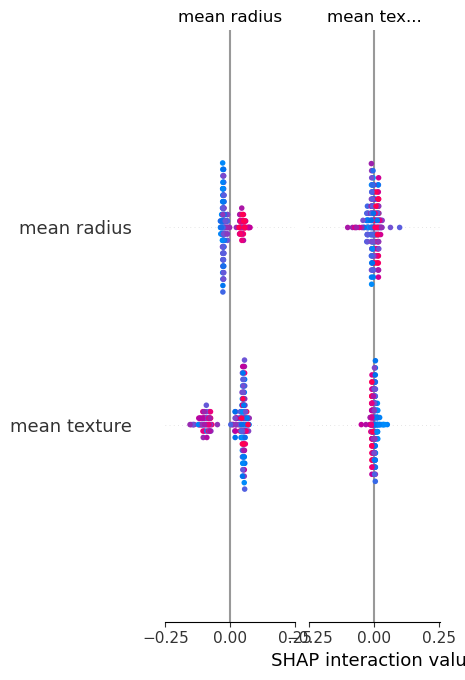

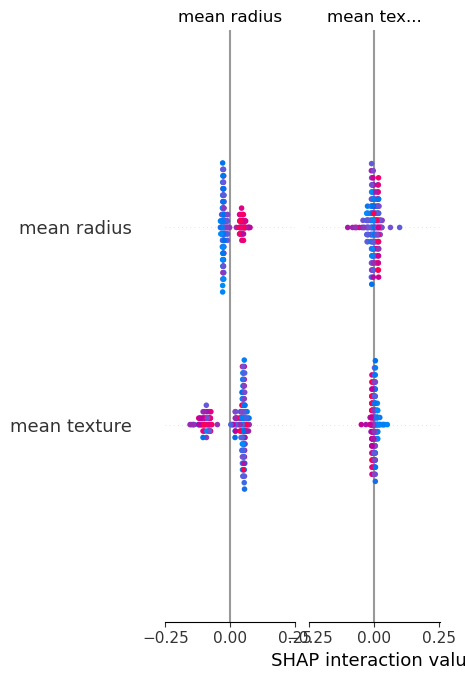

In [47]:
#Step 10 : SHAP Analysis
best_model_name = ("Raw", "Random Forest")
best_model = trained_models[best_model_name]

X_explain = X_train

import shap
import pandas as pd

# Get feature names correctly
feature_names = data.feature_names

# Select best model
best_model_name = ("Raw", "Random Forest")
best_model = trained_models[best_model_name]

# Take small sample for SHAP
X_explain = X_train[:200]

# Convert to DataFrame with CORRECT feature names
X_explain_df = pd.DataFrame(X_explain, columns=feature_names)

# Create SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_explain_df)

# SHAP summary plot
shap.summary_plot(shap_values, X_explain_df)

# SHAP bar plot
shap.summary_plot(shap_values, X_explain_df, plot_type="bar")


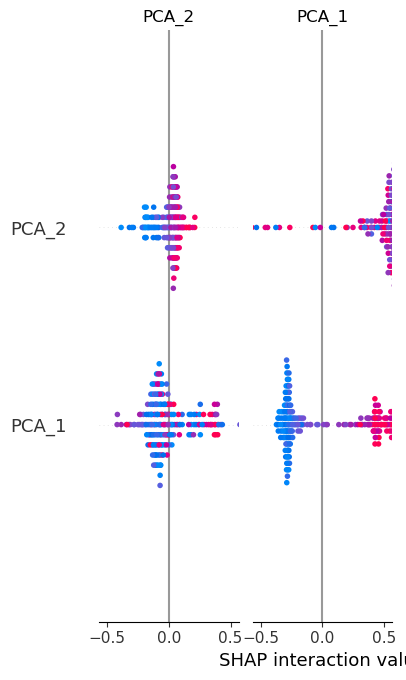

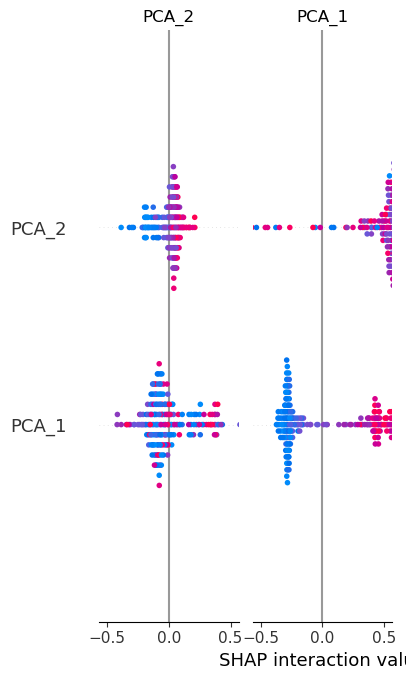

In [48]:
# PCA SHAP
best_model_pca = trained_models[("PCA", "Random Forest")]

X_explain_pca = X_train_pca[:200]

# Create PCA component names
pca_feature_names = [f"PCA_{i+1}" for i in range(X_explain_pca.shape[1])]

X_explain_pca_df = pd.DataFrame(X_explain_pca, columns=pca_feature_names)

explainer_pca = shap.TreeExplainer(best_model_pca)
shap_values_pca = explainer_pca.shap_values(X_explain_pca_df)

# PCA SHAP plots
shap.summary_plot(shap_values_pca, X_explain_pca_df)
shap.summary_plot(shap_values_pca, X_explain_pca_df, plot_type="bar")


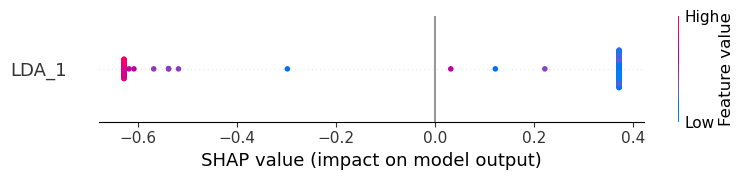

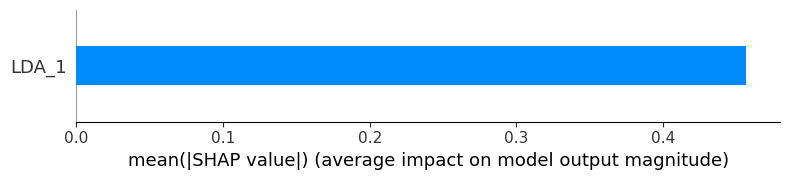

In [50]:
# LDA SHAP
best_model_lda = trained_models[("LDA", "Random Forest")]

X_explain_lda = X_train_lda[:200]

# LDA component names
lda_feature_names = [f"LDA_{i+1}" for i in range(X_explain_lda.shape[1])]

X_explain_lda_df = pd.DataFrame(X_explain_lda, columns=lda_feature_names)

explainer_lda = shap.TreeExplainer(best_model_lda)
shap_values_lda = explainer_lda.shap_values(X_explain_lda_df)

# For binary classification, select SHAP values for the positive class (index 1)
shap_values_lda_pos = shap_values_lda[:, :, 1]

# LDA SHAP plots
shap.summary_plot(shap_values_lda_pos, X_explain_lda_df)
shap.summary_plot(shap_values_lda_pos, X_explain_lda_df, plot_type="bar")
